<a href="https://colab.research.google.com/github/phuongnt3391/DecisionTree/blob/main/IdentifyCreditdefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset

In [27]:
df = pd.read_csv('credit_card_default.csv')
df.columns

Index(['Unnamed: 0', 'limit_bal', 'sex', 'education', 'marriage', 'age',
       'payment_status_sep', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr',
       'bill_statement_sep', 'bill_statement_aug', 'bill_statement_jul',
       'bill_statement_jun', 'bill_statement_may', 'bill_statement_apr',
       'previous_payment_sep', 'previous_payment_aug', 'previous_payment_jul',
       'previous_payment_jun', 'previous_payment_may', 'previous_payment_apr',
       'default_payment_next_month'],
      dtype='object')

In [28]:
df = df.drop('Unnamed: 0',axis=1)

In [29]:
df.head()

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,Unknown,Unknown,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,Unknown,Payment delayed 2 months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,Unknown,Unknown,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
df.describe(include='object').transpose()

,count,unique,top,freq
sex,29850,2,Female,18027
education,29850,4,University,13960
marriage,29850,3,Single,15891
payment_status_sep,30000,10,Unknown,17496
payment_status_aug,30000,10,Unknown,19512
payment_status_jul,30000,10,Unknown,19849
payment_status_jun,30000,10,Unknown,20803
payment_status_may,30000,9,Unknown,21493
payment_status_apr,30000,9,Unknown,21181


In [31]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
age,29850.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.08,71173.77,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.15,69349.39,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.95,64332.86,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.40,60797.16,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.76,59554.11,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.58,16563.28,0.0,1000.00,2100.0,5006.00,873552.0
previous_payment_aug,30000.0,5921.16,23040.87,0.0,833.00,2009.0,5000.00,1684259.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_bal                   30000 non-null  int64  
 1   sex                         29850 non-null  object 
 2   education                   29850 non-null  object 
 3   marriage                    29850 non-null  object 
 4   age                         29850 non-null  float64
 5   payment_status_sep          30000 non-null  object 
 6   payment_status_aug          30000 non-null  object 
 7   payment_status_jul          30000 non-null  object 
 8   payment_status_jun          30000 non-null  object 
 9   payment_status_may          30000 non-null  object 
 10  payment_status_apr          30000 non-null  object 
 11  bill_statement_sep          30000 non-null  int64  
 12  bill_statement_aug          30000 non-null  int64  
 13  bill_statement_jul          300

In [103]:
X = df.copy()
y = X.pop('default_payment_next_month')

In [104]:
X.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age',
       'payment_status_sep', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr',
       'bill_statement_sep', 'bill_statement_aug', 'bill_statement_jul',
       'bill_statement_jun', 'bill_statement_may', 'bill_statement_apr',
       'previous_payment_sep', 'previous_payment_aug', 'previous_payment_jul',
       'previous_payment_jun', 'previous_payment_may', 'previous_payment_apr'],
      dtype='object')

In [100]:
print(X)

       limit_bal     sex  ... previous_payment_may previous_payment_apr
0          20000  Female  ...                    0                    0
1         120000  Female  ...                    0                 2000
2          90000  Female  ...                 1000                 5000
3          50000  Female  ...                 1069                 1000
4          50000    Male  ...                  689                  679
...          ...     ...  ...                  ...                  ...
29995     220000     NaN  ...                 5000                 1000
29996     150000    Male  ...                    0                    0
29997      30000    Male  ...                 2000                 3100
29998      80000    Male  ...                52964                 1804
29999      50000    Male  ...                 1000                 1000

[30000 rows x 23 columns]


In [97]:
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int64


Exploratory data analysis

In [35]:
import seaborn as sns
import plotly.express as px
import plotly.io as pio

Plot distribution of age and plot it by gender

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



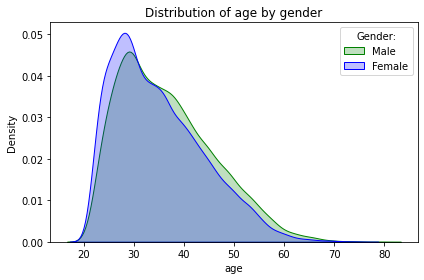

In [36]:
fig,ax = plt.subplots()
sns.distplot(df.loc[df.sex=='Male','age'].dropna(),
            hist=False,
            color='green',
            kde_kws={'shade': True},
            ax = ax,
            label='Male')
sns.distplot(df.loc[df.sex=='Female','age'].dropna(),
            hist=False,
            color='blue',
            kde_kws={'shade': True},
            ax = ax,
            label='Female')
ax.set_title('Distribution of age by gender')
ax.legend(title='Gender:')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of age')

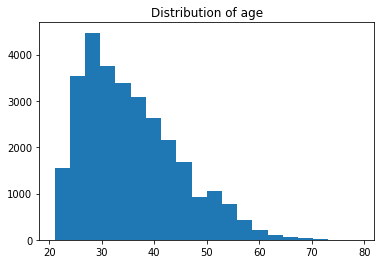

In [37]:
plt.hist(data=df,x='age',bins=20)
plt.title('Distribution of age')

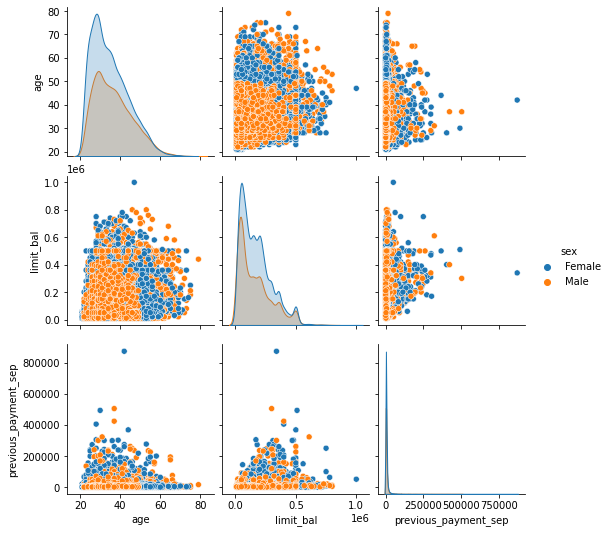

In [38]:
sns.pairplot(df[['sex','age','limit_bal','previous_payment_sep']], hue='sex')

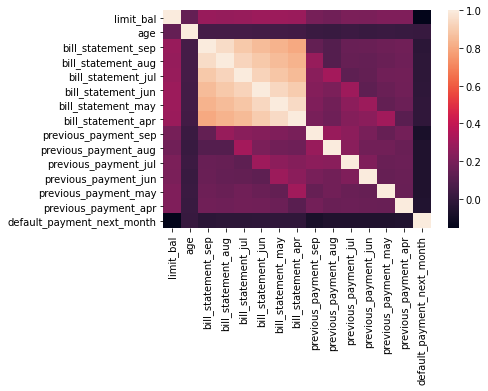

In [39]:
sns.heatmap(df.corr())

We can directly inspect the correlation between the features and the target

In [40]:
df.select_dtypes(include='number').corr()[['default_payment_next_month']]

,default_payment_next_month
limit_bal,-0.153520
age,0.014491
bill_statement_sep,-0.019644
bill_statement_aug,-0.014193
bill_statement_jul,-0.014076
bill_statement_jun,-0.010156
bill_statement_may,-0.006760
bill_statement_apr,-0.005372
previous_payment_sep,-0.072929
previous_payment_aug,-0.058579


Plot the limit balance for each gender and education level

Text(0.5, 1.0, 'Distribution of limit balance as per education level')

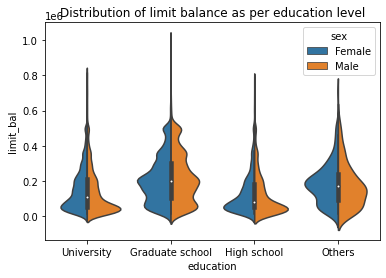

In [41]:
ax = sns.violinplot(data=df,x='education', y='limit_bal', hue= 'sex',split= True)
ax.set_title('Distribution of limit balance as per education level')

Plot the default_payment_next_month as per education level 




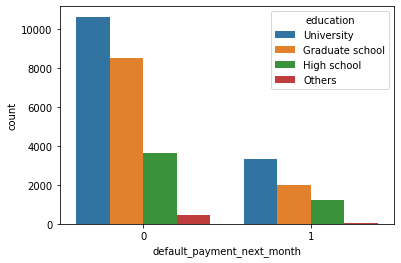

In [42]:
sns.countplot(data=df,x='default_payment_next_month',hue='education')

Plot the default_payment_next_month for each gender type

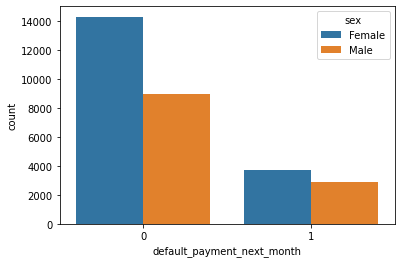

In [43]:
sns.countplot(data=df,x='default_payment_next_month',hue='sex')

Investigate the percentage of default per each education level

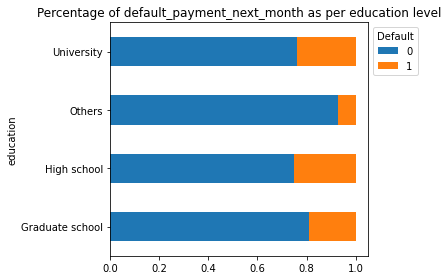

In [44]:
ax = df.groupby('education')['default_payment_next_month'].value_counts(normalize=True).unstack().plot(kind='barh',stacked='True')
ax.set_title('Percentage of default_payment_next_month as per education level')
ax.legend(title='Default',bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

Split the dataset into training set and test set

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42,shuffle=False)

In [106]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age',
       'payment_status_sep', 'payment_status_aug', 'payment_status_jul',
       'payment_status_jun', 'payment_status_may', 'payment_status_apr',
       'bill_statement_sep', 'bill_statement_aug', 'bill_statement_jul',
       'bill_statement_jun', 'bill_statement_may', 'bill_statement_apr',
       'previous_payment_sep', 'previous_payment_aug', 'previous_payment_jul',
       'previous_payment_jun', 'previous_payment_may', 'previous_payment_apr',
       'default_payment_next_month'],
      dtype='object')

Dealing with missing data

In [107]:
pip install missingno

In [109]:
import pandas as pd
import missingno
from sklearn.impute import SimpleImputer

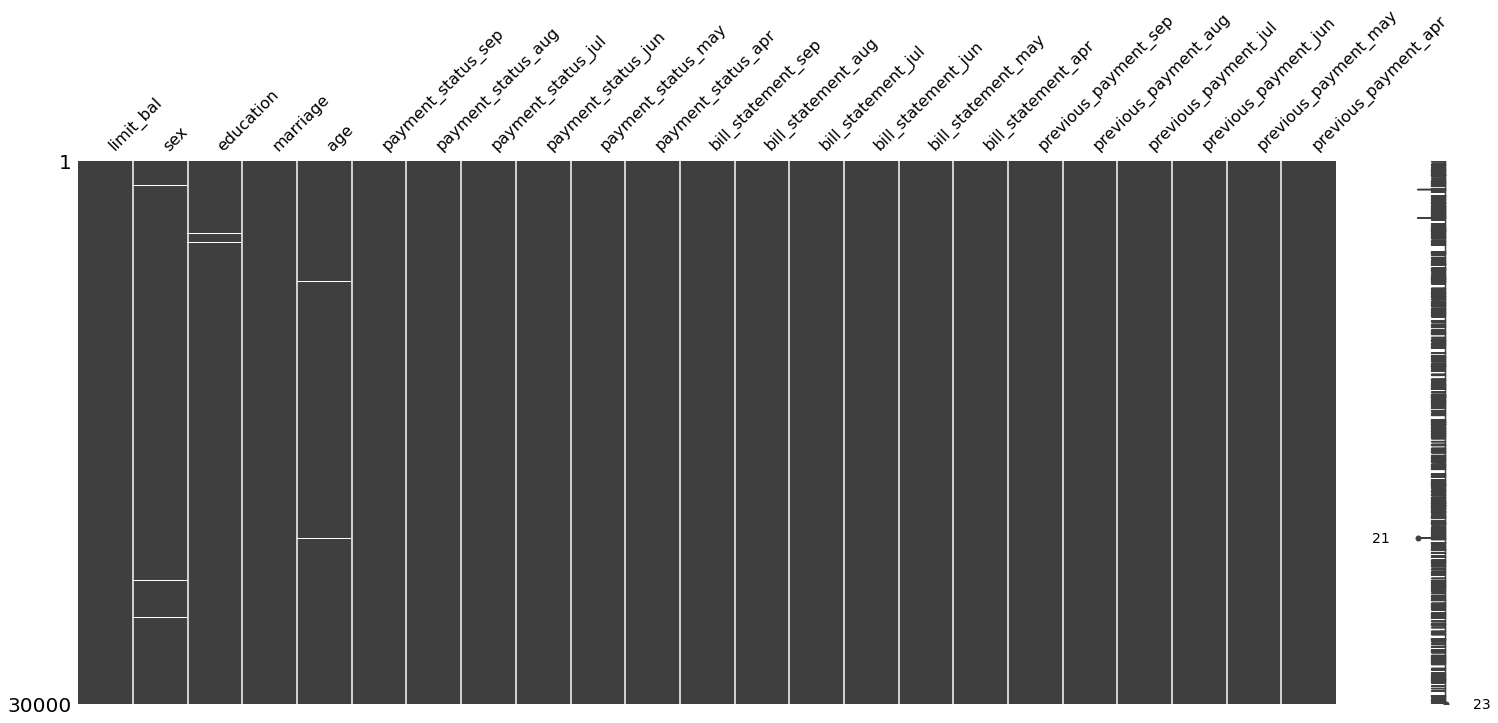

In [110]:
missingno.matrix(X)
plt.show()

In [111]:
NUM_FEATURES =['age']
CAT_FEATURES = ['sex','education','marriage']

Impute the numerical column:'age'

In [113]:
for col in NUM_FEATURES:
  num_imputer = SimpleImputer(strategy='median')
  num_imputer.fit(X_train[[col]])
  X_train.loc[:,col] =  num_imputer.transform(X_train[[col]])
  X_test.loc[:,col] =  num_imputer.transform(X_test[[col]])



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Impute the categorical variables

In [122]:
for col in CAT_FEATURES:
  num_imputer = SimpleImputer(strategy='most_frequent')
  num_imputer.fit(X_train[[col]])
  X_train.loc[:,col] =  num_imputer.transform(X_train[[col]])
  X_test.loc[:,col] =  num_imputer.transform(X_test[[col]])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Verify the result of filling missing data

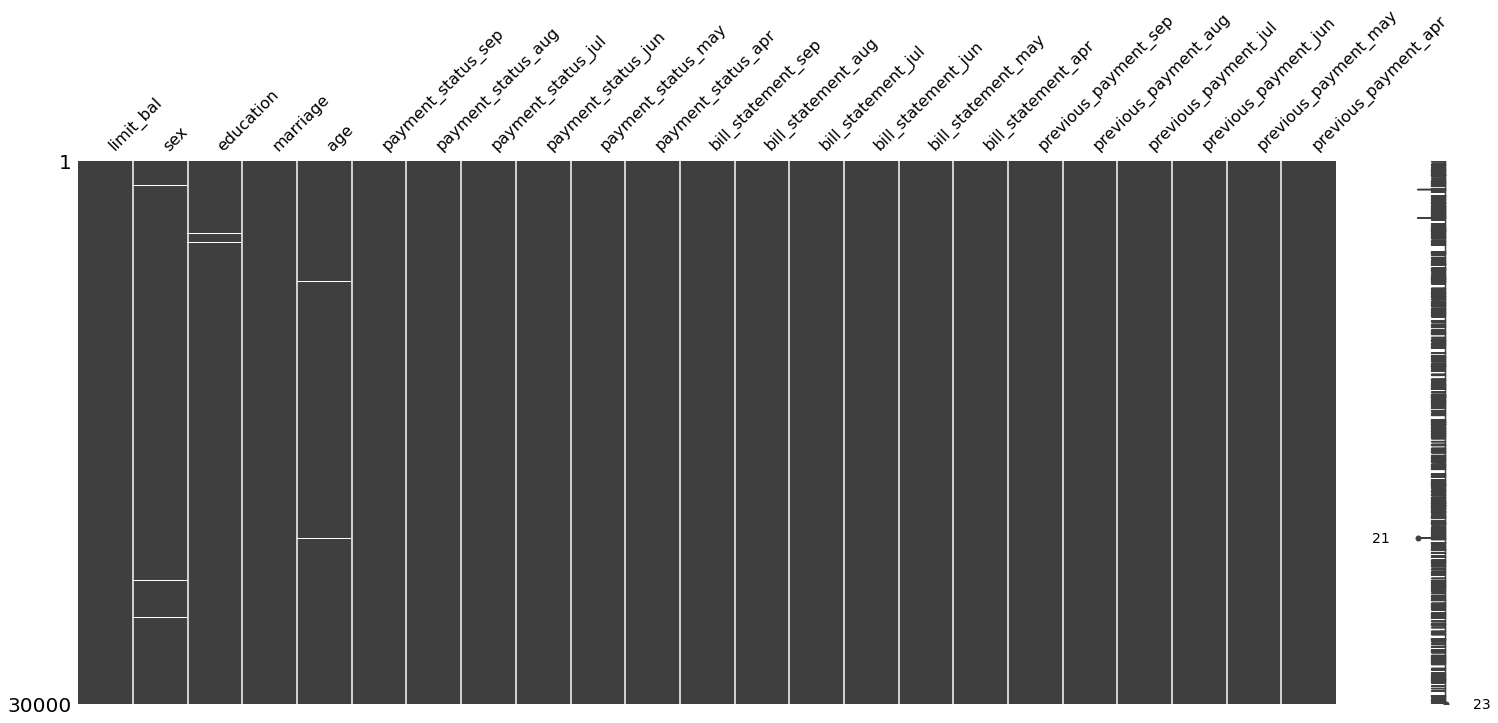

In [124]:
missingno.matrix(pd.DataFrame(X))
plt.show()


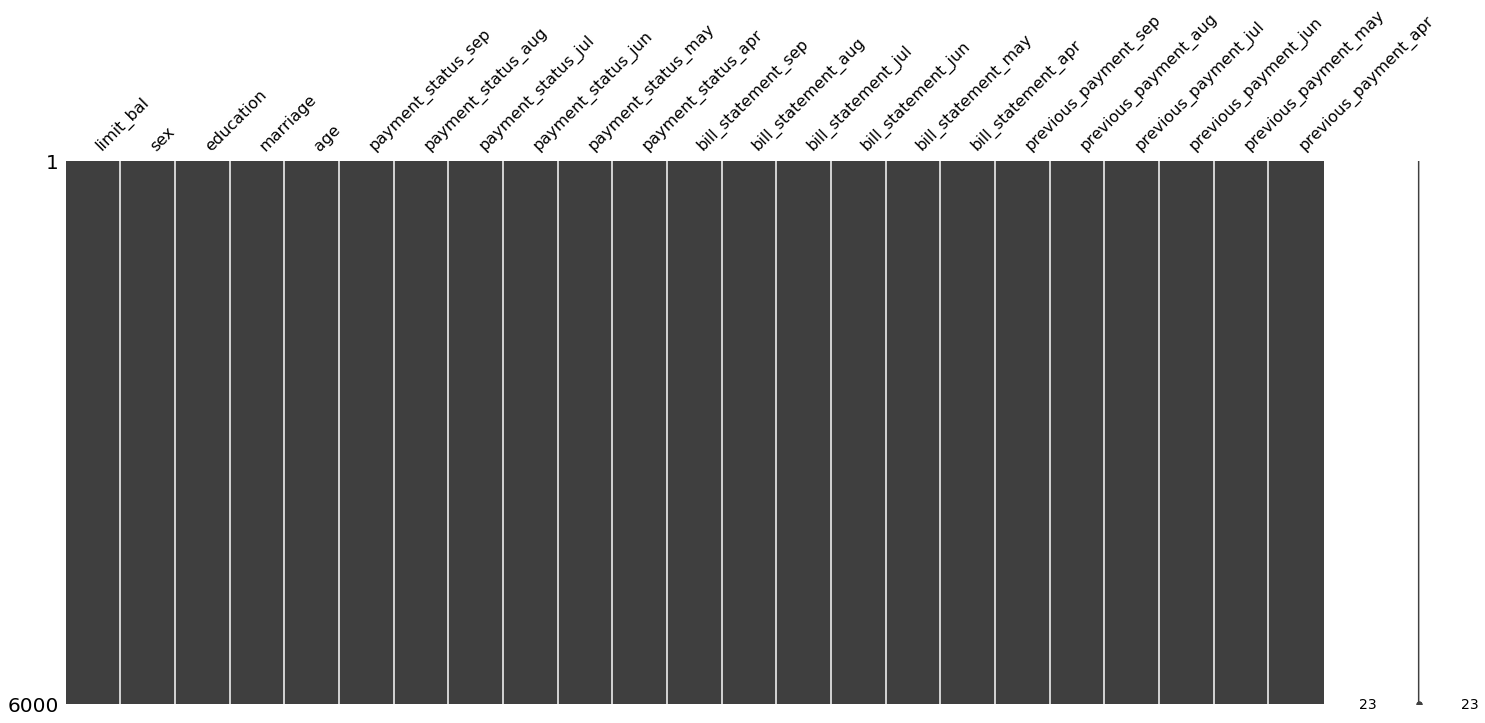

In [125]:
missingno.matrix(X_test)
plt.show()



Encoding the categorical variables

In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [127]:
COL ='education'
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])
X_train_copy.loc[:,COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:,COL] = label_enc.transform(X_test_copy[COL])



Select categorical features for OneHotCoding

In [128]:
CAT_FEATURES = X_train.select_dtypes(include='object').columns.to_list()

Instantiate OneHotEncoder object

In [129]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop ='first' )

Create column transformer using OneHotEncoder

In [132]:
one_hot_encoder = ColumnTransformer([('one_hot',one_hot_encoder,CAT_FEATURES)])

Fit the transformer

In [133]:
one_hot_encoder.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('one_hot',
                                 ColumnTransformer(n_jobs=None,
                                                   remainder='drop',
                                                   sparse_threshold=0.3,
                                                   transformer_weights=None,
                                                   transformers=[('one_hot',
                                                                  OneHotEncoder(categories='auto',
                                                                                drop='first',
                                                                                dtype=<class 'numpy.float64'>,
                                                                                handle_unknown='error',
                                                                         

Apply the transformation to both training and test set 

In [134]:
col_names = one_hot_encoder.get_feature_names()
X_train_cat = pd.DataFrame(one_hot_encoder.transform(X_train),columns=col_names, index=X_train.index)
X_train_ohe = pd.concat([X_train,X_train_cat],axis=1).drop(CAT_FEATURES,axis=1)
X_test_cat = pd.DataFrame(one_hot_encoder.transform(X_test),columns=col_names, index=X_test.index)
X_test_ohe = pd.concat([X_test,X_test_cat],axis=1).drop(CAT_FEATURES,axis=1)




In [135]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_ohe,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [136]:
y_preds = model.predict(X_test_ohe)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_preds,y_test))



              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4619
           1       0.41      0.38      0.40      1381

    accuracy                           0.73      6000
   macro avg       0.62      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



In [138]:
print(confusion_matrix(y_preds,y_test))

[[3878  741]
 [ 856  525]]


In [139]:
model.feature_importances_

array([5.68702808e-02, 7.09168899e-02, 7.18342314e-02, 5.16261981e-02,
       4.69403375e-02, 4.46564733e-02, 4.32634339e-02, 4.98914748e-02,
       4.89971697e-02, 6.20934947e-02, 4.72028798e-02, 4.13919790e-02,
       3.95355460e-02, 5.59384936e-02, 1.11033103e-02, 8.66152807e-03,
       1.14079340e-03, 1.25438422e-02, 3.45945720e-03, 8.52469339e-03,
       3.68589047e-03, 1.23719787e-01, 5.29917266e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.25646644e-03, 0.00000000e+00, 3.57882752e-02, 8.21765240e-03,
       0.00000000e+00, 6.43555011e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.13125776e-03, 0.00000000e+00, 2.82725440e-03,
       0.00000000e+00, 0.00000000e+00, 2.00290221e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.15047408e-03, 0.00000000e+00,
       6.31935352e-03, 8.10262035e-04, 5.24427573e-04, 1.86753364e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.65919710e-03,
      

In [140]:
X_train_ohe.columns

Index(['limit_bal', 'age', 'bill_statement_sep', 'bill_statement_aug',
       'bill_statement_jul', 'bill_statement_jun', 'bill_statement_may',
       'bill_statement_apr', 'previous_payment_sep', 'previous_payment_aug',
       'previous_payment_jul', 'previous_payment_jun', 'previous_payment_may',
       'previous_payment_apr', 'one_hot__one_hot__x0_Male',
       'one_hot__one_hot__x1_High school', 'one_hot__one_hot__x1_Others',
       'one_hot__one_hot__x1_University', 'one_hot__one_hot__x2_Others',
       'one_hot__one_hot__x2_Single',
       'one_hot__one_hot__x3_Payment delayed 1 month',
       'one_hot__one_hot__x3_Payment delayed 2 months',
       'one_hot__one_hot__x3_Payment delayed 3 months',
       'one_hot__one_hot__x3_Payment delayed 4 months',
       'one_hot__one_hot__x3_Payment delayed 5 months',
       'one_hot__one_hot__x3_Payment delayed 6 months',
       'one_hot__one_hot__x3_Payment delayed 7 months',
       'one_hot__one_hot__x3_Payment delayed 8 months',
       '

In [141]:
important_features = pd.DataFrame(index=X_train_ohe.columns,data=model.feature_importances_,columns=['Feature Importances'])
print(important_features.sort_values('Feature Importances'))

                                               Feature Importances
one_hot__one_hot__x4_Payment delayed 7 months             0.000000
one_hot__one_hot__x5_Payment delayed 1 month              0.000000
one_hot__one_hot__x4_Payment delayed 8 months             0.000000
one_hot__one_hot__x8_Payment delayed 8 months             0.000000
one_hot__one_hot__x4_Payment delayed 6 months             0.000000
...                                                            ...
limit_bal                                                 0.056870
previous_payment_aug                                      0.062093
age                                                       0.070917
bill_statement_sep                                        0.071834
one_hot__one_hot__x3_Payment delayed 2 months             0.123720

[72 rows x 1 columns]


Plot the simplified Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

[Text(930.0, 1057.0, 'one_hot__one_hot__x3_Payment delayed 2 months <= 0.5\ngini = 0.347\nsamples = 24000\nvalue = [18630, 5370]'),
 Text(465.0, 755.0, 'one_hot__one_hot__x4_Payment delayed 2 months <= 0.5\ngini = 0.292\nsamples = 21815\nvalue = [17945, 3870]'),
 Text(232.5, 453.0, 'previous_payment_aug <= 1500.5\ngini = 0.258\nsamples = 19926\nvalue = [16895, 3031]'),
 Text(116.25, 151.0, 'gini = 0.34\nsamples = 7566\nvalue = [5924, 1642]'),
 Text(348.75, 151.0, 'gini = 0.199\nsamples = 12360\nvalue = [10971, 1389]'),
 Text(697.5, 453.0, 'one_hot__one_hot__x3_Payment delayed 3 months <= 0.5\ngini = 0.494\nsamples = 1889\nvalue = [1050, 839]'),
 Text(581.25, 151.0, 'gini = 0.482\nsamples = 1678\nvalue = [997, 681]'),
 Text(813.75, 151.0, 'gini = 0.376\nsamples = 211\nvalue = [53, 158]'),
 Text(1395.0, 755.0, 'bill_statement_sep <= 577.0\ngini = 0.43\nsamples = 2185\nvalue = [685, 1500]'),
 Text(1162.5, 453.0, 'previous_payment_aug <= 451.0\ngini = 0.447\nsamples = 74\nvalue = [49, 25]'

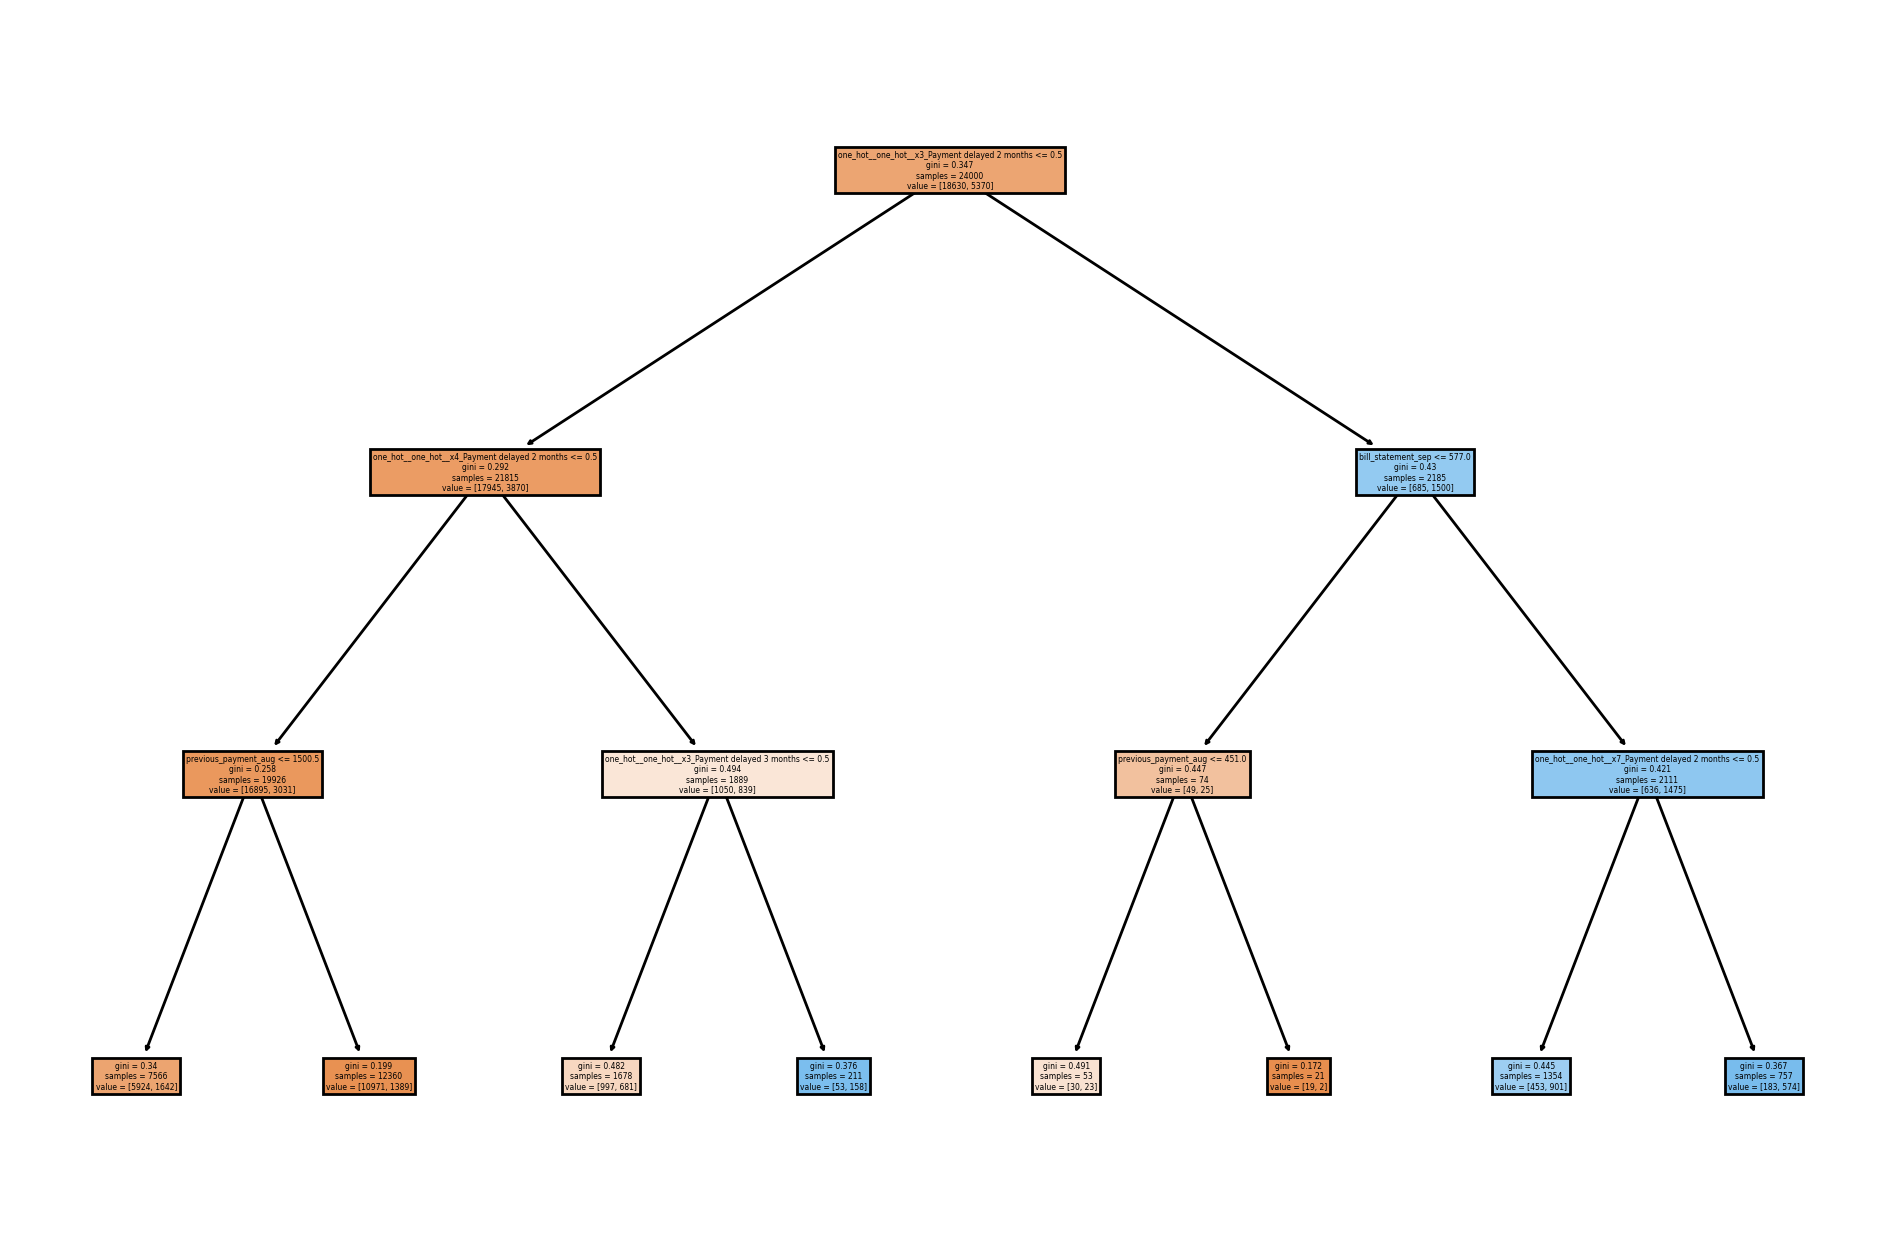

In [154]:
pruned_tree = DecisionTreeClassifier(max_depth =3, random_state=42)
pruned_tree.fit(X_train_ohe, y_train)
plt.figure(figsize=(12,8),dpi=200)
plot_tree(pruned_tree, feature_names=X_train_ohe.columns,filled=True)



Try Random Forest approach

In [157]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =20, max_features = 'auto', random_state=101)
rfc.fit(X_train_ohe,y_train)
preds = rfc.predict(X_test_ohe)


In [158]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_preds,y_test))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4619
           1       0.41      0.38      0.40      1381

    accuracy                           0.73      6000
   macro avg       0.62      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



Using Random Forest method, we can get the Accuracy of 73%, which is the same as what Decision Tree approach generates.